<a href="https://colab.research.google.com/github/dehpour/Neutron-Cross-Section/blob/main/Optical%20Model%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Optical Model Neutron Scatt X.S. Prediction from A (Thermal Region)

In [2]:
A ,order = 235, 100

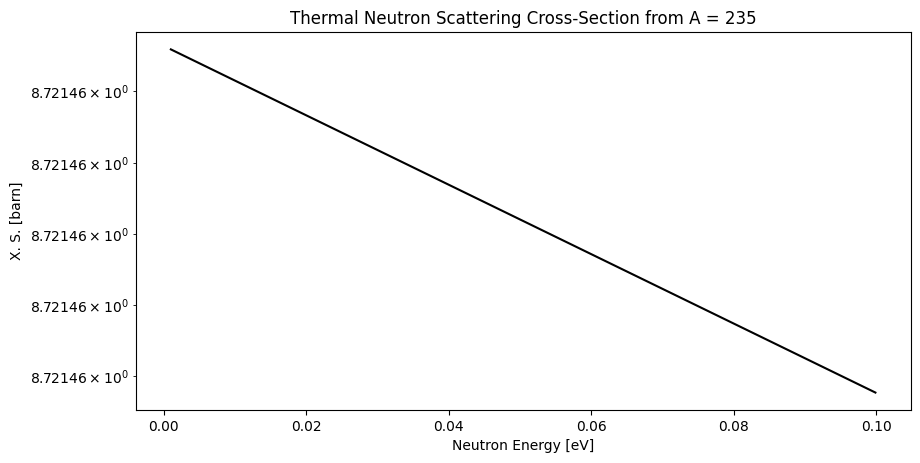

In [3]:
E = np.arange(0.001, 0.1, 0.0001)                                           #ev
k2 = []                                                                     #fm^-2
for i in range (len(E)):
  k2.append((2*939.57*E[i]*10**-6)/(197.33**2))
k = np.sqrt(k2)                                                             #fm^-1
a = 1.35*A**(1/3)                                                           #fm

sigma = []
sum = []
for j in range (len(E)):
  for l in range (order):
    sum.append((4*np.pi/k2[j])*( (2*l+1)*(np.sin(k[j]*a)**(2*l+1))**2)/100) #divide by 100 for convert fm^2 to barn
  sigma.append(np.sum(sum))
  sum = []

plt.figure(figsize=(10, 5),dpi=100)
plt.yscale("log")
plt.title('Thermal Neutron Scattering Cross-Section from A = '+str(A))
plt.xlabel('Neutron Energy [eV]')
plt.ylabel('X. S. [barn]')
plt.plot(E, sigma, color='black')
plt.show()

# Compaire Optical Model and Experiment (Thermal Region)

All of this data was taken from the cross sections of the elements and their isotopes in ***Neutron News, Vol. 3, No. 3, 1992, pp. 29-37***.

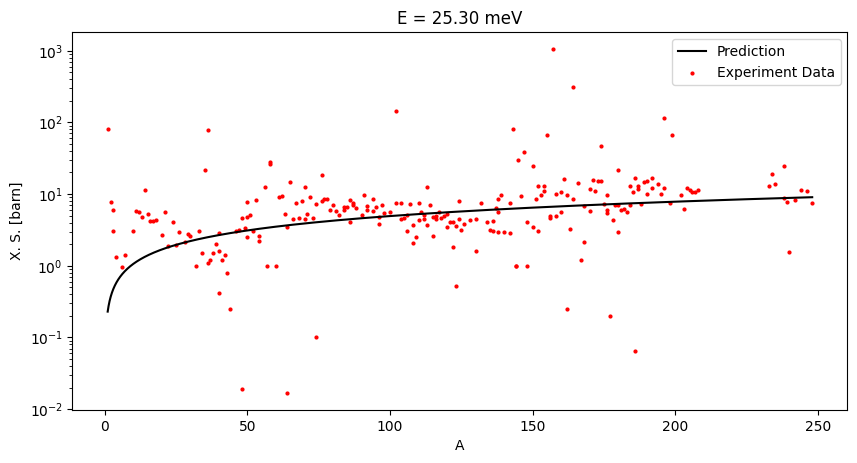

In [4]:
exper = pd.read_csv('https://raw.githubusercontent.com/dehpour/Neutron-Cross-Section/main/db/scatt_x.s._table.csv')
A_iso, sears = exper['A'], exper['1992Sears Scatt X.S.']

E ,order = 0.0253, 100
A = np.arange(1, 248, 0.01)
k2 = (2*939.57*E*10**-6)/(197.33**2)   
k = np.sqrt(k2)
a = []
for i in range (len(A)):
  a.append(1.35*A[i]**(1/3))
  
sigma = []
sum = []
for j in range (len(A)):
  for l in range (order):
    sum.append((4*np.pi/k2)*( (2*l+1)*(np.sin(k*a[j])**(2*l+1))**2)/100)
  sigma.append(np.sum(sum))
  sum = []

plt.figure(figsize=(10, 5),dpi=100)
plt.plot(A, sigma, label="Prediction", c='black')
plt.scatter(A_iso, sears, label="Experiment Data", c='r', marker='o', s=4)
plt.yscale("log")
plt.title('E = 25.30 meV')
plt.xlabel('A')
plt.ylabel('X. S. [barn]')
plt.legend()
plt.show()